In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
business =  pd.read_json("../yelp_training_set/yelp_training_set_business.json", lines=True)
reviews = pd.read_json("../yelp_training_set/yelp_training_set_review.json", lines=True)
checkins = pd.read_json("../yelp_training_set/yelp_training_set_checkin.json", lines=True)
users = pd.read_json("../yelp_training_set/yelp_training_set_user.json", lines=True)
BUJoin = pd.merge(business, reviews, on="business_id", how="inner")

In [3]:
BUJoin["len"]= BUJoin["categories"].apply(lambda x:len(x))


In [4]:
BUJoin.head(1)

,business_id,categories,city,full_address,latitude,longitude,name,neighborhoods,open,review_count,...,state,type_x,date,review_id,stars_y,text,type_y,user_id,votes,len
0,rncjoVoEFUJGCUoC1JgnUA,"[Accountants, Professional Services, Tax Servi...",Peoria,"8466 W Peoria Ave\nSte 6\nPeoria, AZ 85345",33.581867,-112.241596,Peoria Income Tax Service,[],True,3,...,AZ,business,2012-02-12,EnAdKZ_u_wj9ifTRwkfVwg,5,I highly reccomend this place. They helped my ...,review,HK35ai8frY75iMYBVdD_Pg,"{'funny': 0, 'useful': 1, 'cool': 0}",4


In [5]:
UniqueLabelsLenCounts= BUJoin.groupby('len').len.count()
UniqueLabelsLenCounts

len
0        777
1       2173
2     110895
3      52106
4      33721
5      21691
6       6273
7       1903
8        177
9        177
10        14
Name: len, dtype: int64

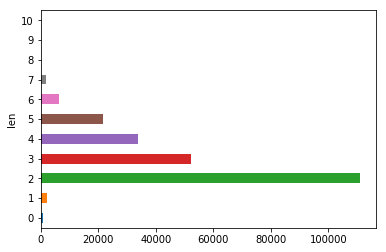

In [6]:
UniqueLabelsLenCounts.plot(kind='barh')
plt.show()

In [7]:
uniqueSet= set()
for l in BUJoin.categories:
    uniqueSet.update(l)
    
len(uniqueSet)

508

In [8]:
uniqueSet

{'Accessories',
 'Accountants',
 'Active Life',
 'Acupuncture',
 'Adult',
 'Adult Education',
 'Adult Entertainment',
 'Advertising',
 'Afghan',
 'African',
 'Airlines',
 'Airport Shuttles',
 'Airports',
 'Allergists',
 'Amateur Sports Teams',
 'American (New)',
 'American (Traditional)',
 'Amusement Parks',
 'Animal Shelters',
 'Antiques',
 'Apartments',
 'Appliances',
 'Appliances & Repair',
 'Aquariums',
 'Arcades',
 'Archery',
 'Architects',
 'Argentine',
 'Art Galleries',
 'Art Schools',
 'Art Supplies',
 'Arts & Crafts',
 'Arts & Entertainment',
 'Asian Fusion',
 'Auto Detailing',
 'Auto Glass Services',
 'Auto Parts & Supplies',
 'Auto Repair',
 'Automotive',
 'Baby Gear & Furniture',
 'Bagels',
 'Bakeries',
 'Bankruptcy Law',
 'Banks & Credit Unions',
 'Barbeque',
 'Barbers',
 'Barre Classes',
 'Bars',
 'Basque',
 'Beauty & Spas',
 'Bed & Breakfast',
 'Beer, Wine & Spirits',
 'Bike Rentals',
 'Bikes',
 'Boat Charters',
 'Boating',
 'Body Shops',
 'Books, Mags, Music & Video',
 

In [9]:
counts = dict()
for i in uniqueSet:
    for l in BUJoin.categories:
        if i in l:
            counts[i] = counts.get(i, 0) + 1

In [10]:
counts

{'Accessories': 514,
 'Accountants': 28,
 'Active Life': 5938,
 'Acupuncture': 38,
 'Adult': 41,
 'Adult Education': 9,
 'Adult Entertainment': 35,
 'Advertising': 5,
 'Afghan': 98,
 'African': 42,
 'Airlines': 378,
 'Airport Shuttles': 52,
 'Airports': 911,
 'Allergists': 24,
 'Amateur Sports Teams': 164,
 'American (New)': 24010,
 'American (Traditional)': 17693,
 'Amusement Parks': 487,
 'Animal Shelters': 82,
 'Antiques': 374,
 'Apartments': 362,
 'Appliances': 136,
 'Appliances & Repair': 50,
 'Aquariums': 3,
 'Arcades': 301,
 'Archery': 8,
 'Architects': 3,
 'Argentine': 7,
 'Art Galleries': 545,
 'Art Schools': 61,
 'Art Supplies': 150,
 'Arts & Crafts': 772,
 'Arts & Entertainment': 8002,
 'Asian Fusion': 4258,
 'Auto Detailing': 137,
 'Auto Glass Services': 149,
 'Auto Parts & Supplies': 182,
 'Auto Repair': 1202,
 'Automotive': 3157,
 'Baby Gear & Furniture': 157,
 'Bagels': 1390,
 'Bakeries': 4198,
 'Bankruptcy Law': 15,
 'Banks & Credit Unions': 145,
 'Barbeque': 3912,
 'Ba

In [11]:
counts = pd.DataFrame(list(counts.items()), columns=['Categories', 'Counts'])

In [12]:
counts.sort_values("Counts",ascending=False).head(25)

,Categories,Counts
59,Restaurants,158430
11,Food,33217
443,Nightlife,30136
334,Bars,27014
62,American (New),24010
224,Mexican,19953
253,American (Traditional),17693
246,Pizza,14423
328,Shopping,14335
456,Italian,12610


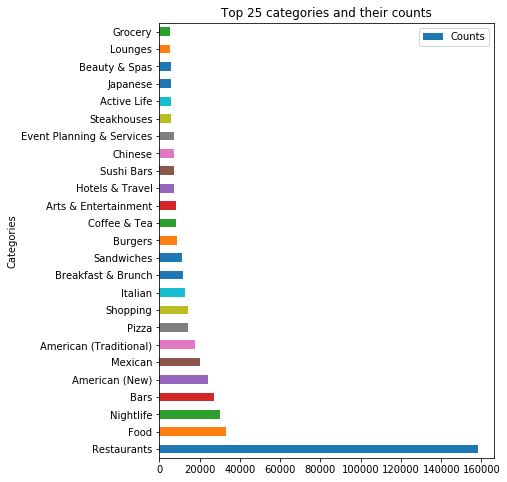

In [16]:
counts.sort_values("Counts",ascending=False).head(25)[:25].plot(kind='barh', x= "Categories", y="Counts", figsize= (6,8), title ="Top 25 categories and their counts")
plt.show()